<a href="https://colab.research.google.com/github/vmkainga/Computer-Vision/blob/main/Computer_Vision_Python_Project_Violet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Build and evaluate a model for verifying people's age.


### b) Defining the Metric for Success

We will have accomplished our objective if we build a high accuarcy model that helps verify people's age

### c) Understanding the Context 

The supermarket chain would like to explore whether Data Science can help them adhere to
alcohol laws by making sure they do not sell alcohol to people underage. You are asked to
conduct that evaluation, so as you set to work, keep the following in mind:

● The shops are equipped with cameras in the checkout area which are triggered when a
person is buying alcohol.

● Computer vision methods can be used to determine the age of a person from a photo.

● The task then is to build and evaluate a model for verifying people's age.



### d) Recording the Experimental Design
1. Load datasets and libraries
2. Clean data and analyze it
3. Build a model
4. Summarize findings
5. Provide recommendations
6. Challenge the solution

### e) Data Relevance
The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# load and preview dataset
labels = pd.read_csv('/content/labels.csv')

labels.head(10)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


In [5]:
# check dataset shape
labels.shape

(7591, 2)

In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


## <font color='#2F4F4F'>3. Modelling</font>

In [7]:
#import required libraries
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import tensorflow as tf

In [8]:
#initialize ImageDataGenerator
generator = ImageDataGenerator(rescale=1./255)

In [9]:
#load test
generator_flow = generator.flow_from_dataframe(
        dataframe=labels,
        directory='/content/drive/MyDrive/Computer vision/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345
)

Found 7578 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 13 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


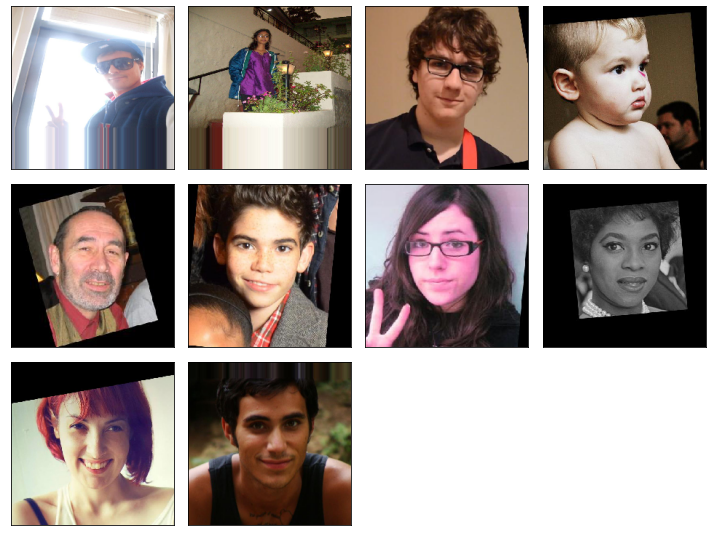

In [10]:
#plot features
features, target = next(generator_flow)

fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f523c1c4e10>]],
      dtype=object)

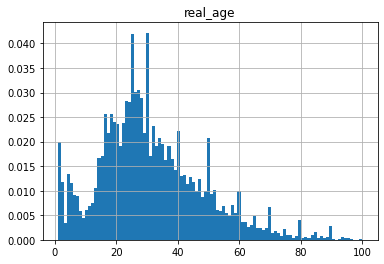

In [11]:
#plot distribution of age labels
labels.hist(bins=100,density=True)

In [12]:
# load train
generator_train = ImageDataGenerator(validation_split=0.25, rescale=1./255,shear_range=0.2,
                                    horizontal_flip=True,)


train_X = generator_train.flow_from_dataframe(
        dataframe=labels,
        directory='/content/drive/MyDrive/Computer vision/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
        seed=12345,
        subset='training')

Found 5684 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 13 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [13]:
#load test
generator_test = ImageDataGenerator(validation_split=0.25, rescale=1./255)
test_X = generator_test.flow_from_dataframe(
        dataframe=labels,
        directory='/content/drive/MyDrive/Computer vision/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
        seed=12345,
        subset='validation')

Found 1894 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 13 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [14]:
#create model

optimizer= Adam() 
backbone = ResNet50(input_shape=(150,150,3),weights='imagenet', include_top=False)
model = Sequential()
model.add(backbone)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='relu'))
model.compile(loss="mean_squared_error",optimizer=optimizer, metrics=["mean_absolute_error"])


94781440/94765736 [==============================] - 2s 0us/step


In [18]:
#model function
def model_train(model, train_data, test_data,batch_size=None,epochs=10, steps_per_epoch =None, validation_steps=None):
    my_callbacks = [ tf.keras.callbacks.EarlyStopping(patience=20)] 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
          validation_data=test_data,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps,
          verbose=1, epochs=epochs,  callbacks=my_callbacks)
    return model

In [ ]:
#Apply function
model_trained = model_train(model, train_X, test_X,batch_size=None,epochs=50,
                            steps_per_epoch =None, validation_steps=None)



Epoch 1/50
178/178 [==============================] - 102s 573ms/step - loss: 16.3585 - mean_absolute_error: 3.0610 - val_loss: 97.4347 - val_mean_absolute_error: 7.5650
Epoch 2/50
178/178 [==============================] - 103s 576ms/step - loss: 15.1314 - mean_absolute_error: 2.9733 - val_loss: 89.5312 - val_mean_absolute_error: 7.0521
Epoch 3/50
178/178 [==============================] - 103s 575ms/step - loss: 11.9829 - mean_absolute_error: 2.6700 - val_loss: 88.0770 - val_mean_absolute_error: 7.0249
Epoch 4/50
178/178 [==============================] - 104s 581ms/step - loss: 10.3789 - mean_absolute_error: 2.4621 - val_loss: 84.8326 - val_mean_absolute_error: 6.9848
Epoch 5/50
178/178 [==============================] - 103s 579ms/step - loss: 9.6650 - mean_absolute_error: 2.3746 - val_loss: 91.6396 - val_mean_absolute_error: 7.2676
Epoch 6/50
178/178 [==============================] - 103s 580ms/step - loss: 9.2638 - mean_absolute_error: 2.3336 - val_loss: 87.8493 - val_mean_absol

In [ ]:
#saving trained model

model_trained.save("model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## <font color='#2F4F4F'> 4. Findings/Recommendations


</font>


We have achieved quite good MAE, which can predict age of person with  ±  6.5

## <font color='#2F4F4F'>5. Challenging your Solution</font>

What can you do to improve your project?

1. Looking for more data- which could translate into new cases or new features

2. Train with more epochs/increase patience

3. Train with more data